In [1]:
#!/usr/bin/env python
# coding: utf-8
# # Esben Pedersen & Toti Larson
# # 5/29/2020
# # # # # # # # # # # # # # # # # #

# For data handling and plotting
import numpy as np                # Computation
import pandas as pd               # Data handling
import matplotlib.pyplot as plt   # Plotting

# For the machine learning library (We will use the K-means and PCA modules)
from sklearn import decomposition                # 
from sklearn.decomposition import PCA            # PCA toolkit
from sklearn.cluster import KMeans               # K-means toolkit
from sklearn import datasets                     #
from sklearn.preprocessing import StandardScaler # For Standardizing features

# For Elbow visualization and statistical identification
from yellowbrick.cluster import KElbowVisualizer

# For Silhouette visualization and statistical identification
from yellowbrick.cluster import SilhouetteVisualizer

# For outlining text on plots for more visible contrast
import matplotlib.patheffects as PathEffects

# To resolve issue where elements are printed on top of each other in Biplots
#from adjustText import adjust_text  # # need to incorporate this from Github

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# # Data importation and pre-proccessing

#import csv files from core. A lot of room for improvement here.
dataimport = r'C:\Users\Esben Pedersen\Documents\UT Austin\MS Thesis\Geochem\Github\Core-chemofacies-clustering\RandomCore.csv'
LOD_T5 = r'C:\Users\Esben Pedersen\Documents\UT Austin\MS Thesis\Geochem\Github\Core-chemofacies-clustering\T5iLOD.csv'

#convert imported files to dataframes. The idea is to not change the original files, YET ;)
coredata = pd.read_csv(dataimport)

LODT5 = pd.read_csv(LOD_T5)
coredata.sort_values(by = ['Depth_calculated']) # Sorts coredata by chosen depth attribute (i.e. Depth Calculated, XRF adjusted depth)
elements = ['Na', 'Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca', 'Ti','Mn', 'Fe', 'Ba',
            'V', 'Cr', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Pb','Se', 'Th', 'Rb',
            'U', 'Sr', 'Y', 'Zr', 'Nb', 'Mo']

# Add Limit of Detection (LOD) to each element
coredata[elements]=np.maximum(coredata[elements],LODT5)

# Vector of the outlier values for each element
Element_outlier=(coredata[elements]).mean()+4*(coredata[elements]).std() # toggle 3 or 4 to decide if enough outliers are selected
coredata['Outliers']=((coredata[elements])>Element_outlier).any(axis='columns') # Creates a new column, 'outliers' based on above conditional format

coredata.head()

,Lease_Name,Top_Depth,Core,Box,Inch,Depth_calculated,XRF_adjusted_depth,Na,Mg,Al,...,Se,Th,Rb,U,Sr,Y,Zr,Nb,Mo,Outliers
0,Random core,583.0,C04,B02,1,583.083333,583.083333,0.08,0.42,1.22,...,6.0,2.0,9.0,10.0,380.0,13.0,19.0,5.0,6.0,True
1,Random core,583.0,C04,B02,3,583.250000,583.250000,0.08,0.57,1.33,...,6.0,2.0,8.0,10.0,346.0,22.0,14.0,5.0,6.0,True
2,Random core,583.0,C04,B02,5,583.416667,583.416667,0.35,0.52,1.45,...,6.0,2.0,8.0,10.0,260.0,11.0,22.0,5.0,6.0,True
3,Random core,583.0,C04,B02,7,583.583333,583.583333,0.72,0.96,6.43,...,6.0,3.0,59.0,10.0,549.0,27.0,119.0,10.0,11.0,True
4,Random core,583.0,C04,B02,9,583.750000,583.750000,0.47,0.95,5.84,...,6.0,3.0,65.0,10.0,622.0,16.0,123.0,9.0,13.0,True


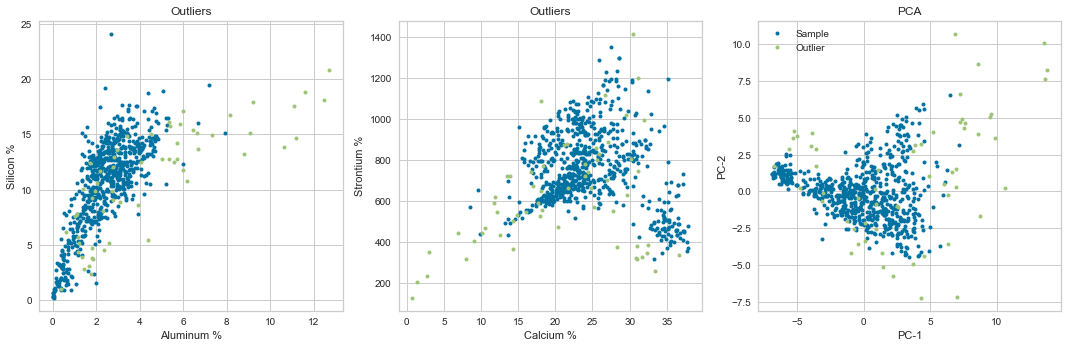

In [3]:
# # Visualize Outlier detection methodology

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = (15,5))
plt.subplot(1, 3, 1)
groups = coredata.groupby("Outliers")
for name, group in groups:
    plt.plot(group["Al"], group["Si"], marker = "o",  ms=4, linestyle="", label=name)
plt.title('Outliers')
plt.xlabel('Aluminum %')
plt.ylabel('Silicon %')
plt.tight_layout()

plt.subplot(1, 3, 2)
groups = coredata.groupby("Outliers")
for name, group in groups:
    plt.plot(group["Ca"], group["Sr"], marker = "o",  ms = 4, linestyle = "", label = name)
plt.title('Outliers')
plt.xlabel('Calcium %')
plt.ylabel('Strontium %')
plt.tight_layout()

# Quick Principal Component Analysis for outlier visualization
pca = decomposition.PCA(n_components=len(elements))#toggle n_components
# Centered (mean = zero X - X.mean(axis=0)) and with unit variance
X = coredata 
y = coredata.Outliers.values
X = X[elements].values
X_centered = StandardScaler().fit(X).transform(X)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.subplot(1, 3, 3)
plt.plot(X_pca[y == False, 0], X_pca[y == False, 1],marker = "o", label = 'Sample', ms = 4, linestyle = "")
plt.plot(X_pca[y == True, 0], X_pca[y == True, 1], marker = "o", label = 'Outlier', ms = 4, linestyle = "")

plt.title('PCA')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.tight_layout()



In [4]:
# # Outlier Handling

X = (coredata[coredata['Outliers'] == False]) # excludes outliers
x = X[elements].values                        # all elements
df_segmentation = x                           # create variable for PCA and K-means computation

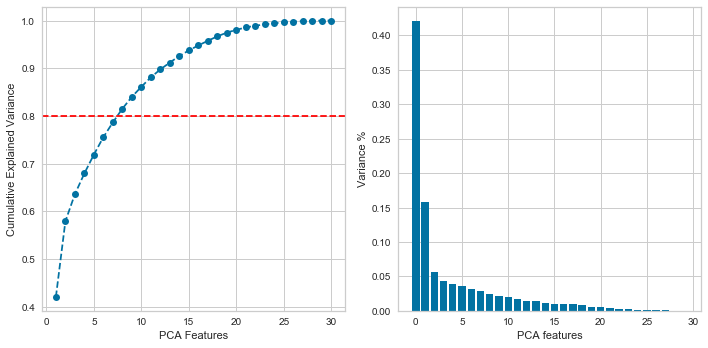

In [5]:
# # Data scaling and PCA Computation
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)
pca = PCA();
pca.fit(segmentation_std);

# The attribute shows how much variance is explained by each of the individual components
pca.explained_variance_ratio_;
comp_num = len(pca.explained_variance_ratio_);
features= np.arange(len(elements))

fig, ((ax4, ax5)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,(comp_num + 1)), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.axhline(y=0.8, color='red', linestyle = '--')
plt.xlabel('PCA Features')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(features, pca.explained_variance_ratio_, color='b')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.tight_layout()

In [6]:
# # USER INPUT REQUESTED # #

# Choose number of components that capture ~80% of the variance (From above graph) # Need to decide here
pca = PCA(n_components = 5)

# # USER INPUT REQUESTED # #

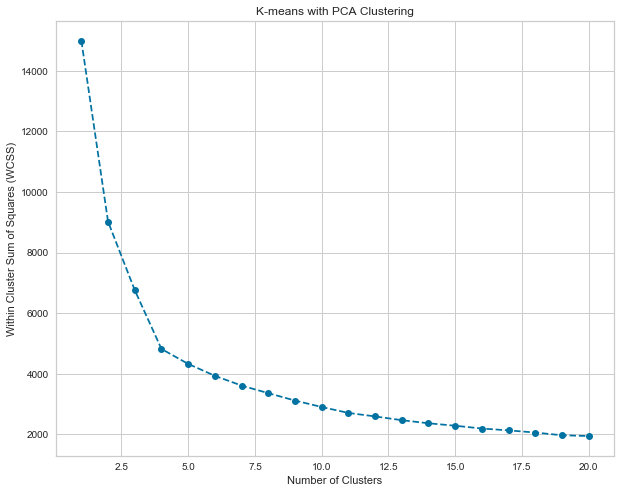

In [7]:
# # 

# Fit the model
pca.fit(segmentation_std)

# Calculated resulting components scores
pca.transform(segmentation_std);

# Calculated resulting components scores
scores_pca = pca.transform(segmentation_std)

# Fit K-means using the transformed data from our PCA steps
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.title('K-means with PCA Clustering')
plt.show()

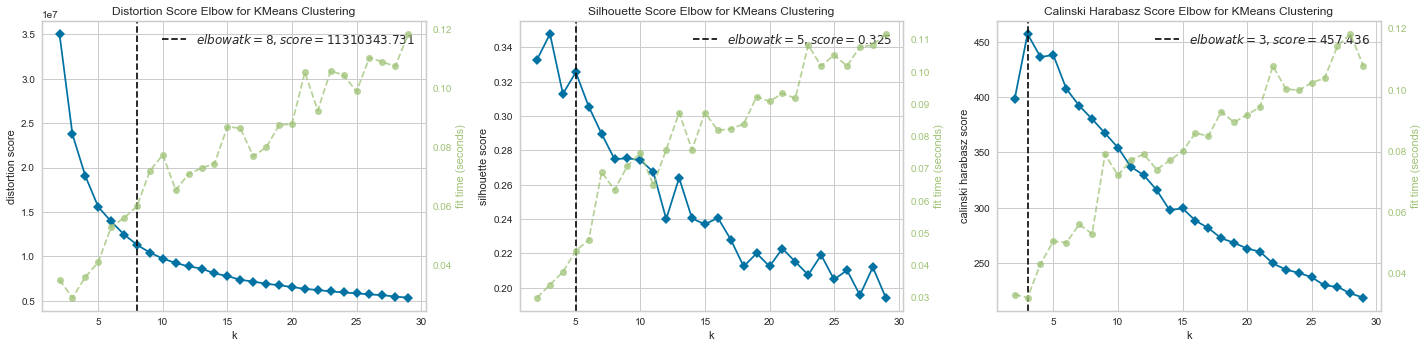

In [8]:
# # Elbow visualization and statistical identification (Yellowbrick)
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Distortion Method
plt.subplot(1, 3, 1)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='distortion')
visualizer.fit(df_segmentation)     # Fit the data to the visualizer
visualizer.finalize()
plt.tight_layout()


# Silhouette Method
plt.subplot(1, 3, 2)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette')
visualizer.fit(df_segmentation)     # Fit the data to the visualizer
visualizer.finalize()
plt.tight_layout()


# Calinski Harabasz Method
plt.subplot(1, 3, 3)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz')
visualizer.fit(df_segmentation)     # Fit the data to the visualizer
visualizer.finalize()
plt.tight_layout()


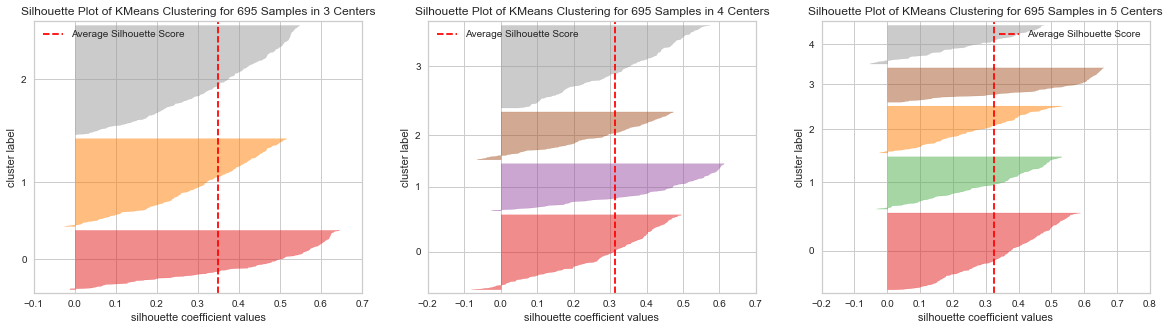

In [9]:
# # Silhouette Visualization (Yellowbrick)
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# K-Means == 3
plt.subplot(1, 3, 1)
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_segmentation)    # Fit the data to the visualizer
visualizer.finalize()              # Draw/show/poof the data

# K-Means == 4
plt.subplot(1, 3, 2)
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_segmentation)    # Fit the data to the visualizer
visualizer.finalize()              # Draw/show/poof the data

# K-Means == 5
plt.subplot(1, 3, 3)
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_segmentation)    # Fit the data to the visualizer
visualizer.finalize()              # Draw/show/poof the data

In [10]:
# # # USER INPUT REQUESTED # #

# # Choose the number of clusters based on the Elbow method on the above graphs
# kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# # # USER INPUT REQUESTED # #

In [11]:
# # Fit our data with the K-means PCA model we have developed
# kmeans_pca.fit(scores_pca);

In [12]:
# y_kmeans = kmeans_pca.predict(scores_pca)

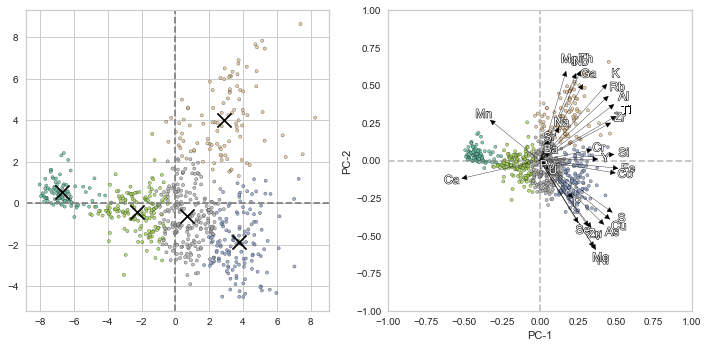

In [15]:
# # # USER INPUT REQUESTED # #
clusters = 5
Principal_components = 5
# # # USER INPUT REQUESTED # #

x_new = pca.fit_transform(scaler.transform(x))
x_cluster = x_new[:, np.arange(Principal_components)] # select the PCAs to use for clustering.
kmeans = KMeans(n_clusters=clusters) # select the number of clusters
kmeans.fit(x_cluster) # results from PCA
y_kmeans = kmeans.predict(x_cluster)


# PCA Biplot Function
def myplot(score, coeff, labels = elements):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex,ys * scaley, c = y_kmeans, cmap = 'Set2', edgecolor='black', alpha=.8, s = 10)
    
    # # visualize projections
    # Set arrow style
    prop = dict(arrowstyle = "-|>", color = 'black', shrinkA = 0, shrinkB = 0, lw = 0.35, ls = '-')
    
    for i in range(n):        
        plt.annotate('', xy=(coeff[i,0] * 2, coeff[i,1] * 2), xytext=(0,0), arrowprops=prop)
        txt = plt.text(coeff[i,0] * 2.25, coeff[i,1] * 2.25, labels[i],
                     color = 'white', alpha = 1, ha = 'center', va = 'center', fontsize=12,
                     weight = 'normal', zorder=10)
        
        txt.set_path_effects([PathEffects.withStroke(linewidth = 1, foreground = 'black')])
            
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC-{}".format(1))
    plt.ylabel("PC-{}".format(2))
    plt.axhline(y = 0, color='gray', linestyle = '--', alpha = 0.5)
    plt.axvline(x = 0, color='gray', linestyle = '--', alpha = 0.5)
    plt.xlabel("PC-{}".format(1))
    plt.ylabel("PC-{}".format(2))
    plt.grid()
    
#     fig.savefig('NAME_HERE.png', dpi=600)
#     fig.savefig('NAME_HERE.pdf')



fig, ((ax6, ax7)) = plt.subplots(nrows = 1, ncols = 2, sharex = True, sharey = True, figsize = (10,5))

# PCA subplot with cluster centers
plt.subplot(1, 2, 1)

centers = kmeans.cluster_centers_
plt.scatter(x_cluster[:, 0], x_cluster[:, 1], c = y_kmeans, cmap='Set2', edgecolor='black', alpha=.8, s = 10)
plt.scatter(centers[:, 0], centers[:, 1],marker='x', c = 'black', s = 200);
plt.axhline(y=0, color='gray', linestyle = '--')
plt.axvline(x=0, color='gray', linestyle = '--')
plt.tight_layout()

# Biplot subplot
plt.subplot(1, 2, 2)
# Call the Biplot function. Use only the 2 PCs.
myplot(scores_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.tight_layout()

#adjust_text(texts, only_move='y', arrowprops=dict(arrowstyle="->", color='r', lw=0.5)) #this will adjust text

plt.tight_layout()

In [14]:
# # Add Chemofacies based on k-means clusters, and append that to the modified CSV

Chemofacies = y_kmeans
X['Chemofacies'] = Chemofacies # create a new column based on above conditional format

Y = (coredata[coredata['Outliers'] == True]) # excludes outliers
Y["Chemofacies"] = np.nan

Z= pd.concat([X, Y], ignore_index=True)

Z.to_csv (r'C:\Users\Esben Pedersen\Documents\UT Austin\MMS Thesis\Github\Core-chemofacies-clustering\Z.csv', index = False, header=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Esben Pedersen\\Documents\\UT Austin\\MMS Thesis\\Github\\Core-chemofacies-clustering\\Z.csv'